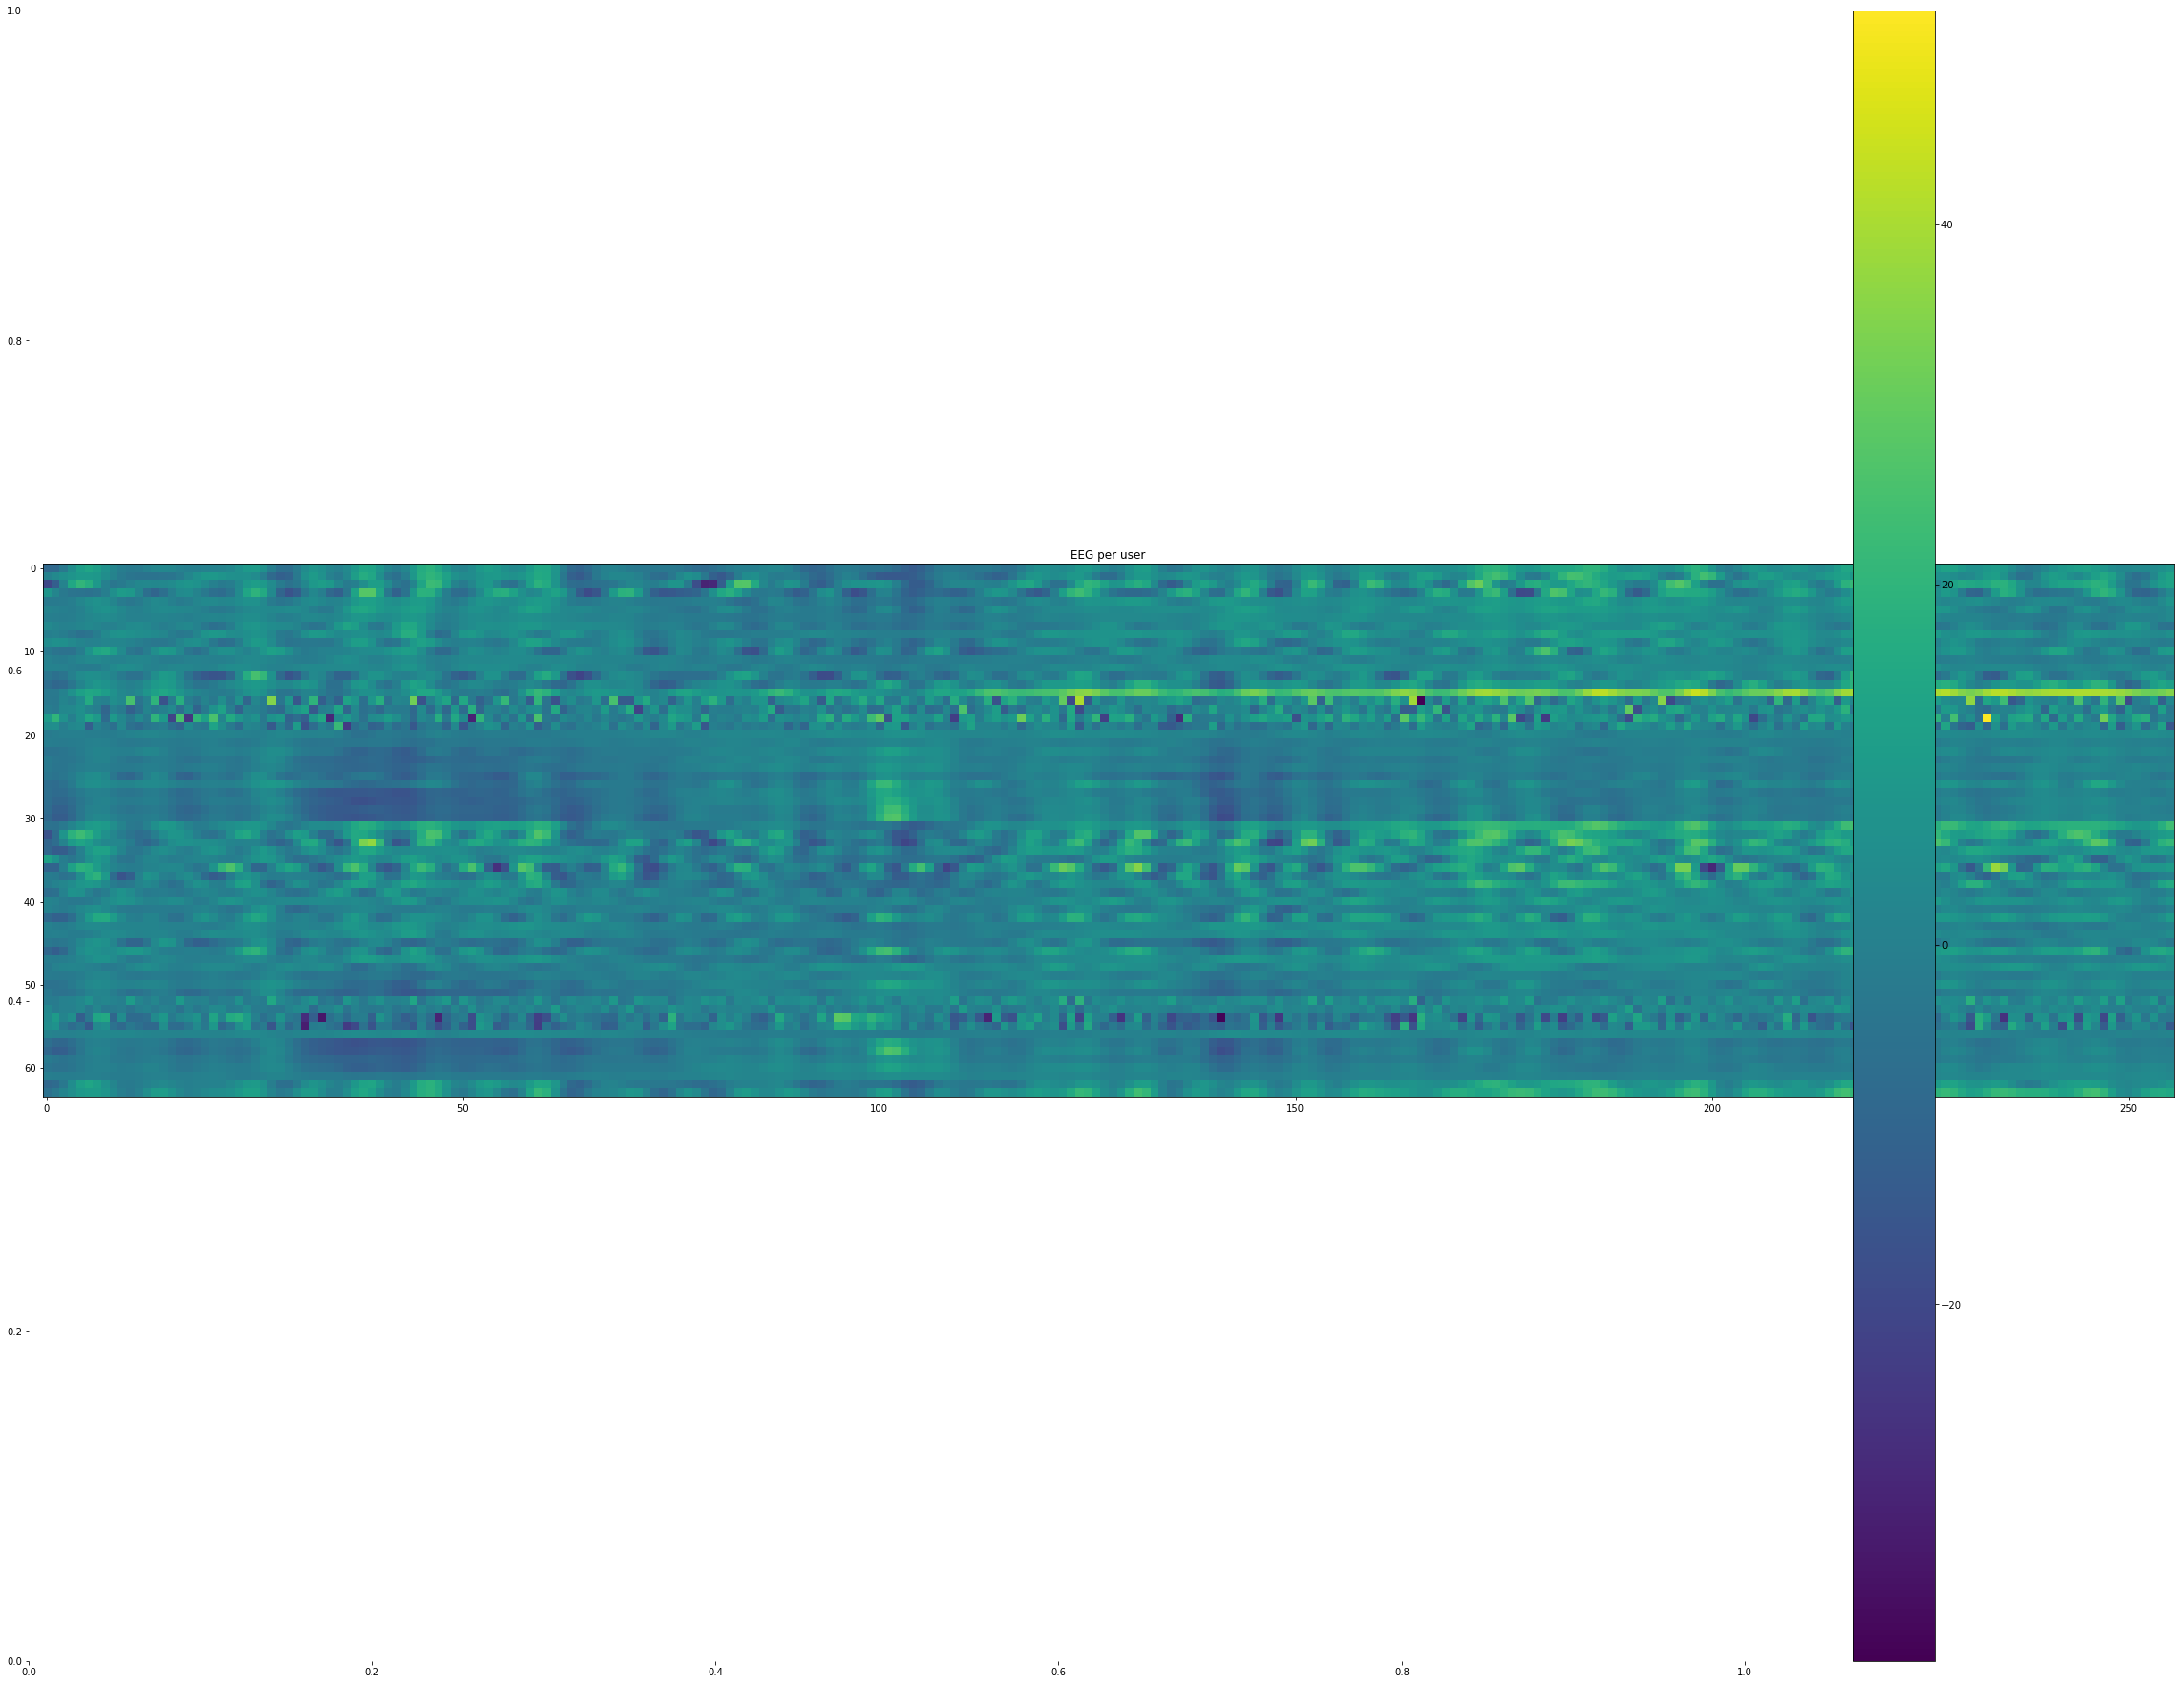

In [96]:
import codecs
import numpy as np
import matplotlib.pyplot as plt

class Recording:
    def __init__(self, id, type):
        self.id=id
        self.type = type
        value = 64*[255*[0]]
        
class Person:
    recordings = []
    def setName(self, id):
        self.id=id
    def setRecordings(self, recordings):
        self.recordings = recordings
    def printData(self):
        print(self.id)
        print(self.recordings)

with codecs.open('co2a0000364.rd.000', 'r', 'utf8') as file:
    rows = file.readlines()
    channels=[]
    headerCount = 0
    person = Person()
    recordingMatrix = numpy.zeros(shape=(64,256), dtype = np.float64)
    for row in rows:
        if '#' not in row:
             recordingMatrix[len(channels)-1][int(row.split(' ')[2])] = row.split(' ')[3]
        else:
            if(headerCount==0):
                person.setName(row.strip('#').split('.')[0])
            elif(headerCount == 3):
                recording = Recording((row.split(' ')[5]), (row.split(' ')[1] + row.split(' ')[2]))
            elif(headerCount>3):
                channels.append(row.split(' ')[1])
#                 print(row.split(' ')[1])
# #                 if(int(headerCount/260)==1):
# #                     print(row)
        headerCount+=1
    person.setRecordings(recordingMatrix)
#     person.printData()   
    fig = plt.figure(figsize=(40, 30))

    ax = fig.add_subplot(111)
    ax.set_title('EEG per user')
    plt.imshow(recordingMatrix)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(True)
    cax.get_yaxis().set_visible(True)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()
